## Assigment 7
##### Karl-Axel Jönsson BME4

In [90]:
import pandas as pd
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' #To get rid of annoying tf messages
import tensorflow as tf 
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras 
from keras import utils
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [272]:
## Read the files 
X_train=pd.read_csv('/Users/karl-axeljonsson/Downloads/cinc2017_features_training.csv')
X_test=pd.read_csv('/Users/karl-axeljonsson/Downloads/cinc2017_features_validation.csv')
y_train=pd.read_csv('/Users/karl-axeljonsson/Downloads/cinc2017_labels_training.csv')
y_test=pd.read_csv('/Users/karl-axeljonsson/Downloads/cinc2017_labels_validation.csv')

X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy().ravel()
y_test=y_test.to_numpy().ravel()

print(X_train.shape, y_train.shape)

(8527, 2704) (8527,)


In [102]:
classes=['Normal','AF','Other rythm','Noisy']

In [14]:
raw_X=pd.read_csv('/Users/karl-axeljonsson/Downloads/cinc2017_raw_train.csv')

print(raw_X.shape)

(8527, 18000)


##### RandomForest

In [84]:
n_estimators = [int (x) for x in np.linspace(start=10, stop=100, num=10)]
max_features=['sqrt','auto']
max_depth=[int (x) for x in np.linspace(start=10, stop=100, num=10)]
min_samples_split=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]

param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_leaf':min_samples_leaf,
            'min_samples_split':min_samples_split,
            'bootstrap':bootstrap}


In [86]:
rf_clf=RandomForestClassifier()

rf_clf_RandomGrid=RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, n_jobs=4, verbose=2, cv=10)

rf_clf_RandomGrid.fit(X_test,y_test)
rf_clf_RandomGrid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [87]:
rf_clf=RandomForestClassifier(max_features='sqrt', max_depth=40, bootstrap=False).fit(X_train,y_train)

In [128]:
y_hat=rf_clf.predict(X_test)

f1_overall=f1_score(y_test,y_hat, average='macro')
f1_array=f1_score(y_test,y_hat,average=None)

for i in range (4):
    print("f1 score for", classes[i],"=",f1_array[i])

print ("The overall f1 score =", f1_overall)

f1 score for Normal = 0.5070422535211268
f1 score for AF = 0.30434782608695654
f1 score for Other rythm = 0.4295774647887323
f1 score for Noisy = 0.847457627118644
The overall f1 score = 0.5221062928788649


##### Neural network

In [ ]:
from sklearn.neural_network import MLPClassifier

model_clf=MLPClassifier((100,100,100),verbose=1, random_state=5).fit(X_train,y_train)
y_hat=model_clf.predict(X_test)



In [138]:
f1_overall=f1_score(y_test,y_hat, average='macro')
f1_array=f1_score(y_test,y_hat,average=None)

for i in range (4):
    print("f1 score for", classes[i],"=",f1_array[i])

print ("The overall f1 score =", f1_overall)

f1 score for Normal = 0.813953488372093
f1 score for AF = 0.9311475409836064
f1 score for Other rythm = 0.7943262411347518
f1 score for Noisy = 0.7878787878787877
The overall f1 score = 0.8318265145923097


#### Deep learning

In [275]:
raw_validation=pd.read_csv('/Users/karl-axeljonsson/Downloads/cinc2017_raw_validation.csv')


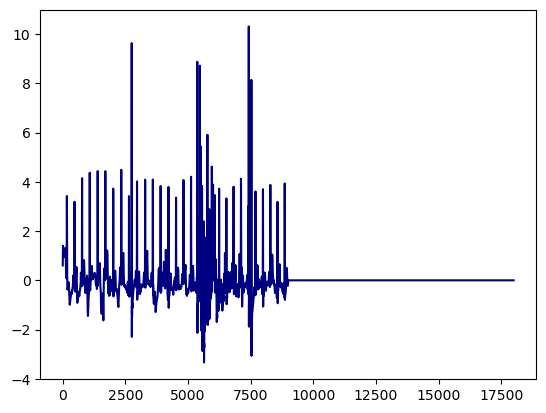

In [285]:
import matplotlib.pyplot as plt

plt.plot(raw_X[0,:], color='navy')
plt.show()

In [ ]:
karl_model=tf.keras.models.Sequential()
karl_model.add(tf.keras.layers.Conv1D(16,2,activation='relu',input_shape=(18000,1)))
karl_model.add(tf.keras.layers.BatchNormalization())
karl_model.add(tf.keras.layers.MaxPooling1D(2))
karl_model.add(tf.keras.layers.Conv1D(16,2,activation='relu'))
karl_model.add(tf.keras.layers.MaxPooling1D(2))
karl_model.add(tf.keras.layers.Flatten())
karl_model.add(tf.keras.layers.Dense(16,activation='relu'))
karl_model.add(tf.keras.layers.Dense(4,activation='softmax'))

opt=tf.keras.optimizers.Adam()
karl_model.compile(optimizer=opt, loss='categorical_crossentropy')

karl_model.summary()
print(karl_model.input)

In [240]:
y_train=tf.keras.utils.to_categorical(y_train)

In [ ]:
history = karl_model.fit(raw_X,y_train,epochs=10, verbose=1, batch_size=32)

In [283]:

y_hat=karl_model.predict(raw_validation)
y_test=tf.keras.utils.to_categorical(y_test)

idx = np.argmax(y_hat, axis=-1)
y_hat = np.zeros( y_hat.shape )
y_hat[ np.arange(y_hat.shape[0]), idx] = 1

f1_overall=f1_score(y_test,y_hat, average='macro')
f1_array=f1_score(y_test,y_hat,average=None)

for i in range (4):
    print("f1 score for", classes[i],"=",f1_array[i])

print ("The overall f1 score =", f1_overall)

10/10 [==============================] - 1s 54ms/step
f1 score for Normal = 0.038461538461538464
f1 score for AF = 0.6696629213483146
f1 score for Other rythm = 0.0
f1 score for Noisy = 0.06451612903225806
The overall f1 score = 0.19316014721052777
